In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Basic features and readability scores

## Character count of Russian tweets
In this exercise, you have been given a dataframe tweets which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

Your task is to create a new feature 'char_count' in tweets which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the content feature of tweets.

Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).

In [ ]:
link = 'https://raw.githubusercontent.com/Andikazidanef15/Feature-Engineering-for-NLP-in-Python/main/russian_tweets.csv'
tweets = pd.read_csv(link, usecols = ['content'])[:1000]


In [ ]:
tweets

,content
0,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,.@vfpatlas well that's a swella word there (di...
3,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,Жители обстреливаемых районов Донецка проводят...
...,...
995,How To Inspire People With Your Music! https:/...
996,... https://t.co/AfWdTkKQlm
997,Trevor Noah: Until we start treating racism li...
998,SenSanders: RT SenJeffMerkley: We must act bol...


In [ ]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(lambda x: len(x))

# Print the average character count
print(tweets['char_count'].mean())

103.462


Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.

## Word count of TED talks
ted is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature word_count which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the transcript feature in ted.

In order to complete this task, you will need to define a function count_words that takes in a string as an argument and returns the number of words in the string. You will then need to apply this function to the transcript feature of ted to create the new feature word_count and compute its mean.

In [ ]:
link_2 = 'https://raw.githubusercontent.com/Andikazidanef15/Feature-Engineering-for-NLP-in-Python/main/ted.csv'
ted = pd.read_csv(link_2, usecols = ['transcript'])[:500]

In [ ]:
ted

,transcript
0,"We're going to talk — my — a new lecture, just..."
1,"This is a representation of your brain, and yo..."
2,It's a great honor today to share with you The...
3,"My passions are music, technology and making t..."
4,It used to be that if you wanted to get a comp...
...,...
495,Today I'm going to unpack for you three exampl...
496,Both myself and my brother belong to the under...
497,John Hockenberry: It's great to be here with y...
498,"What you're doing, right now, at this very mom..."


In [ ]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


Also, notice that the average length of a talk is close to 2000 words. You can use the word_count feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.

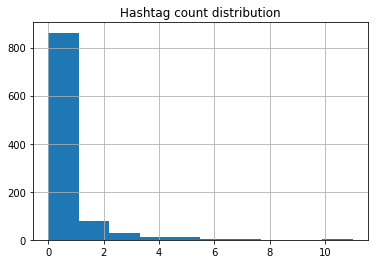

In [ ]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

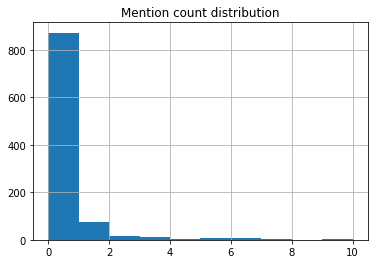

In [ ]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

## Readability of 'The Myth of Sisyphus'
In this exercise, you will compute the Flesch reading ease score for Albert Camus' famous essay The Myth of Sisyphus. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.

The entire essay is in the form of a string and is available as sisyphus_essay.

In [ ]:
!pip install textatistic

  Created wheel for textatistic: filename=textatistic-0.0.1-cp37-none-any.whl size=29069 sha256=bca4dbeccb0a07e1011ab5429884cb24ae42bfba8b0a40552891d690724e602e
  Stored in directory: /root/.cache/pip/wheels/1d/ec/34/69c3cae349149cd91552c4c470efcbd08bbd21ba30b12e08ab
  Created wheel for pyhyphen: filename=PyHyphen-4.0.1-cp37-abi3-linux_x86_64.whl size=52068 sha256=04dab8859c2bb1ea634c54de6cec773c3e4e542931093c24f57eacd5573bcb62
  Stored in directory: /root/.cache/pip/wheels/d3/0c/fd/3b07283df70c067d93261f34140ab7864df6d10bfe59760adc
Successfully built textatistic pyhyphen


In [ ]:
sisyphus_essay = '\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus interests me. A face that toils so close to stones is already stone itself! I see that man going back down with a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time crowns his victory. There is no fate that can not be surmounted by scorn.'


In [ ]:
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.60


Notice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.

# Text preprocessing, POS tagging and NER


## Tokenizing the Gettysburg Address
In this exercise, you will be tokenizing one of the most famous speeches of all time: the Gettysburg Address delivered by American President Abraham Lincoln during the American Civil War.

The entire speech is available as a string named gettysburg.

In [ ]:
gettysburg = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."

In [ ]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

## Lemmatizing the Gettysburg address
In this exercise, we will perform lemmatization on the same gettysburg address from before.

However, this time, we will also take a look at the speech, before and after lemmatization, and try to adjudge the kind of changes that take place to make the piece more machine friendly.

In [ ]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas))

four score and seven year ago -PRON- father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now -PRON- be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . -PRON- be meet on a great battlefield of that war . -PRON- have come to dedicate a portion of that field , as a final resting place for those who here give -PRON- life that that nation may live . -PRON- be altogether fitting and proper that -PRON- should do this . but , in a large sense , -PRON- can not dedicate - -PRON- can not consecrate - -PRON- can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate -PRON- , far above -PRON- poor power to add or detract . the world will little note , nor long remember what -PRON- say here , but -PRON- can never forget what -PRON- do here . -PRON- be for -PRON- the living , rather , to be dedicate her

Observe the lemmatized version of the speech. It isn't very readable to humans but it is in a much more convenient format for a machine to process.

## Cleaning a blog post
In this exercise, you have been given an excerpt from a blog post. Your task is to clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.

The excerpt is available as a string blog and has been printed to the console. The list of stopwords are available as stopwords.

In [ ]:
blog = '\nTwenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.\n'

In [ ]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))

century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinging way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


Take a look at the cleaned text; it is lowercased and devoid of numbers, punctuations and commonly used stopwords. Also, note that the word U.S. was present in the original text. Since it had periods in between, our text cleaning process completely removed it. This may not be ideal behavior. It is always advisable to use your custom functions in place of isalpha() for more nuanced cases.

## Cleaning TED talks in a dataframe
In this exercise, we will revisit the TED Talks from the first chapter. You have been a given a dataframe ted consisting of 5 TED Talks. Your task is to clean these talks using techniques discussed earlier by writing a function preprocess and applying it to the transcript feature of the dataframe.

The stopwords list is available as stopwords.

In [ ]:
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

0      talk new lecture TED illusion create TED try r...
1      representation brain brain break left half log...
2      great honor today share Digital Universe creat...
3      passion music technology thing combination thi...
4      use want computer new program programming requ...
                             ...                        
495    today unpack example iconic design perfect sen...
496    brother belong demographic Pat percent accord ...
497    John Hockenberry great Tom want start question...
498    right moment kill More car internet little mob...
499    real problem math education right basically ha...
Name: transcript, Length: 500, dtype: object


## POS tagging in Lord of the Flies
In this exercise, you will perform part-of-speech tagging on a famous passage from one of the most well-known novels of all time, Lord of the Flies, authored by William Golding.

The passage is available as lotf and has already been printed to the console.

In [ ]:
lotf = 'He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet.'

In [ ]:
# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'ADV'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'AUX'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'NUM'), ('’s', 'PART'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'PRON'), ('’s', 'PART'), ('feet', 'NOUN'), ('.', 'PUNCT')]


## Counting nouns in a piece of text
In this exercise, we will write two functions, nouns() and proper_nouns() that will count the number of other nouns and proper nouns in a piece of text respectively.

These functions will take in a piece of text and generate a list containing the POS tags for each word. It will then return the number of proper nouns/other nouns that the text contains. We will use these functions in the next exercise to generate interesting insights about fake news.

The en_core_web_sm model has already been loaded as nlp in this exercise.

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


In [ ]:
# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


## Noun usage in fake news
In this exercise, you have been given a dataframe headlines that contains news headlines that are either fake or real. Your task is to generate two new features num_propn and num_noun that represent the number of proper nouns and other nouns contained in the title feature of headlines.

Next, we will compute the mean number of proper nouns and other nouns used in fake and real news headlines and compare the values. If there is a remarkable difference, then there is a good chance that using the num_propn and num_noun features in fake news detectors will improve its performance.

To accomplish this task, the functions proper_nouns and nouns that you had built in the previous exercise have already been made available to you.

In [ ]:
link_3 = 'https://raw.githubusercontent.com/Andikazidanef15/Feature-Engineering-for-NLP-in-Python/main/fakenews.csv'
headlines = pd.read_csv(link_3)

In [ ]:
headlines['num_propn'] = headlines['title'].apply(proper_nouns)

# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))

Mean no. of proper nouns in real and fake headlines are 2.37 and 4.35 respectively


In [ ]:
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

Mean no. of other nouns in real and fake headlines are 2.32 and 1.84 respectively


Notice how the mean number of proper nouns is considerably higher for fake news than it is for real news. The opposite seems to be true in the case of other nouns. This fact can be put to great use in designing fake news detectors.



## Named entities in a sentence
In this exercise, we will identify and classify the labels of various named entities in a body of text using one of spaCy's statistical models. We will also verify the veracity of these labels.

In [ ]:
# Load the required model
nlp = spacy.load('en_core_web_sm')

# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


Notice how the model correctly predicted the labels of Google and Mountain View but mislabeled Sundar Pichai as an organization. As discussed in the video, the predictions of the model depend strongly on the data it is trained on. It is possible to train spaCy models on your custom data. You will learn to do this in more advanced NLP courses.

## Identifying people mentioned in a news article
In this exercise, you have been given an excerpt from a news article published in TechCrunch. Your task is to write a function find_people that identifies the names of people that have been mentioned in a particular piece of text. You will then use find_people to identify the people of interest in the article.

The article is available as the string tc and has been printed to the console. The required spacy model has also been already loaded as nlp.

In [ ]:
tc = "\nIt’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it.\n"

In [ ]:
def find_persons(text):
  # Create Doc object
  doc = nlp(text)
  
  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
  # Return persons
  return persons

print(find_persons(tc))

['Sheryl Sandberg', 'Mark Zuckerberg']


# Bag of Words

## BoW model for movie reviews
In this exercise, you have been provided with a corpus of more than 7000 movie tag lines. Your job is to generate the bag of words representation bow_matrix for these taglines. For this exercise, we will ignore the text preprocessing step and generate bow_matrix directly.

We will also investigate the shape of the resultant bow_matrix. The first five taglines in corpus have been printed to the console for you to examine.

In [ ]:
link_4 = 'https://raw.githubusercontent.com/Andikazidanef15/Feature-Engineering-for-NLP-in-Python/main/movie_overviews.csv'
corpus = pd.read_csv(link_4, usecols = ['tagline'])
corpus.dropna(inplace = True)

In [ ]:
corpus.head()

,tagline
1,Roll the dice and unleash the excitement!
2,Still Yelling. Still Fighting. Still Ready for...
3,Friends are the people who let you be yourself...
4,Just When His World Is Back To Normal... He's ...
5,A Los Angeles Crime Saga


In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus['tagline'])

# Print the shape of bow_matrix
print(bow_matrix.shape)

(7033, 6614)


## Analyzing dimensionality and preprocessing
In this exercise, you have been provided with a lem_corpus which contains the pre-processed versions of the movie taglines from the previous exercise. In other words, the taglines have been lowercased and lemmatized, and stopwords have been removed.

Your job is to generate the bag of words representation bow_lem_matrix for these lemmatized taglines and compare its shape with that of bow_matrix obtained in the previous exercise. The first five lemmatized taglines in lem_corpus have been printed to the console for you to examine.

In [ ]:
corpus['tagline'] = corpus['tagline'].apply(preprocess)

In [ ]:
corpus.head()

,tagline
1,roll dice unleash excitement
2,yell fight ready love
3,friend people let let forget
4,world Normal Surprise life
5,Los Angeles crime Saga


In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(corpus['tagline'])

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)

(7033, 5212)


In [ ]:
# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_lem_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
print(bow_df)

      aaargh  aaron  abandon  abby  abduction  ...  zombie  zone  zoo  zorba  zwei
0          0      0        0     0          0  ...       0     0    0      0     0
1          0      0        0     0          0  ...       0     0    0      0     0
2          0      0        0     0          0  ...       0     0    0      0     0
3          0      0        0     0          0  ...       0     0    0      0     0
4          0      0        0     0          0  ...       0     0    0      0     0
...      ...    ...      ...   ...        ...  ...     ...   ...  ...    ...   ...
7028       0      0        0     0          0  ...       0     0    0      0     0
7029       0      0        0     0          0  ...       0     0    0      0     0
7030       0      0        0     0          0  ...       0     0    0      0     0
7031       0      0        0     0          0  ...       0     0    0      0     0
7032       0      0        0     0          0  ...       0     0    0      0     0

[70

# TF-IDF and similarity scores


## tf-idf vectors for TED talks

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted['transcript'])

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)


## Computing dot product
In this exercise, we will learn to compute the dot product between two vectors, A = (1, 3) and B = (-2, 2), using the numpy library. More specifically, we will use the np.dot() function to compute the dot product of two numpy arrays.

In [ ]:
import numpy as np

In [ ]:
# Initialize numpy vectors
A = np.array([1,3])
B = np.array([-2,2])

# Compute dot product
dot_prod = np.dot(A, B)

# Print dot product
print(dot_prod)

4


## Cosine similarity matrix of a corpus
In this exercise, you have been given a corpus, which is a list containing five sentences. The corpus is printed in the console. You have to compute the cosine similarity matrix which contains the pairwise cosine similarity score for every pair of sentences (vectorized using tf-idf).

Remember, the value corresponding to the ith row and jth column of a similarity matrix denotes the similarity score for the ith and jth vector.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
corpus = ['The sun is the largest celestial body in the solar system',
 'The solar system consists of the sun and eight revolving planets',
 'Ra was the Egyptian Sun God',
 'The Pyramids were the pinnacle of Egyptian architecture',
 'The quick brown fox jumps over the lazy dog']
 

In [ ]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


As you will see in a subsequent lesson, computing the cosine similarity matrix lies at the heart of many practical systems such as recommenders. From our similarity matrix, we see that the first and the second sentence are the most similar. Also the fifth sentence has, on average, the lowest pairwise cosine scores. This is intuitive as it contains entities that are not present in the other sentences.

## Comparing linear_kernel and cosine_similarity
In this exercise, you have been given tfidf_matrix which contains the tf-idf vectors of a thousand documents. Your task is to generate the cosine similarity matrix for these vectors first using cosine_similarity and then, using linear_kernel.

We will then compare the computation times for both functions.

In [ ]:
import time

### Cosine Similarity

In [ ]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]
Time taken: 0.0017600059509277344 seconds


### linear_kernel

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]
Time taken: 0.007668256759643555 seconds


Notice how both linear_kernel and cosine_similarity produced the same result. However, linear_kernel took a smaller amount of time to execute. When you're working with a very large amount of data and your vectors are in the tf-idf representation, it is good practice to default to linear_kernel to improve performance. (NOTE: In case, you see linear_kernel taking more time, it's because the dataset we're dealing with is extremely small and Python's time module is incapable of capture such minute time differences accurately)

## Plot recommendation engine
In this exercise, we will build a recommendation engine that suggests movies based on similarity of plot lines. You have been given a get_recommendations() function that takes in the title of a movie, a similarity matrix and an indices series as its arguments and outputs a list of most similar movies. indices has already been provided to you.

You have also been given a movie_plots Series that contains the plot lines of several movies. Your task is to generate a cosine similarity matrix for the tf-idf vectors of these plots.

Consequently, we will check the potency of our engine by generating recommendations for one of my favorite movies, The Dark Knight Rises.

In [ ]:
movie_overview = pd.read_csv(link_4)

In [ ]:
movie_plots = movie_overview['overview'].dropna()

In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_plots)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 

## The recommender function
In this exercise, we will build a recommender function get_recommendations(), as discussed in the lesson and the previous exercise. As we know, it takes in a title, a cosine similarity matrix, and a movie title and index mapping as arguments and outputs a list of 10 titles most similar to the original title (excluding the title itself).

You have been given a dataset metadata that consists of the movie titles and overviews. The head of this dataset has been printed to console.

In [ ]:
metadata = movie_overview[['title','tagline']]

In [ ]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

## Generating word vectors
In this exercise, we will generate the pairwise similarity scores of all the words in a sentence. The sentence is available as sent and has been printed to the console for your convenience.

In [ ]:
sent = 'I like apples and oranges'

In [ ]:
# Create the doc object
doc = nlp(sent)

# Compute pairwise similarity scores
for token1 in doc:
  for token2 in doc:
    print(token1.text, token2.text, token1.similarity(token2))

I I 1.0
I like 0.111476846
I apples 0.0067715086
I and -0.117666654
I oranges -0.0021670829
like I 0.111476846
like like 1.0
like apples 0.052829094
like and -0.15288135
like oranges -0.043253582
apples I 0.0067715086
apples like 0.052829094
apples apples 1.0
apples and -0.0011159935


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

apples oranges 0.635426
and I -0.117666654
and like -0.15288135
and apples -0.0011159935
and and 1.0
and oranges 0.089370795
oranges I -0.0021670829
oranges like -0.043253582
oranges apples 0.635426
oranges and 0.089370795
oranges oranges 1.0


/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea